In [ ]:
pip install import_ipynb

In [ ]:
import import_ipynb
import Distance_Matrix

In [3]:
#Libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

#Ant Colony

The **Ant Colony Algorithm** is a metaheuristic optimization technique inspired by the behavior of ants foraging for food. It involves simulating the behavior of ants in searching for the best routes in a graph or solution space. Ants leave pheromones on the routes they visit, which influences the preferences of other ants and leads to the discovery of better and better routes.


###Support functions:


**Distributor Function:**


In [4]:
def distributor(distance_matrix, visited, R, alpha, beta):
  # Cumulative distribution function
  n = len(distance_matrix)
  current_city = visited[-1]
  sum_path = 0
  dist = []
  tik = 0
  dist_value = 0

  for city in range(n):
    if city not in visited and distance_matrix[current_city][city] != -1:
      sum_path += ((distance_matrix[current_city][city])**alpha) * (R[current_city][city])**beta

  for city in range(n):
    if city not in visited and distance_matrix[current_city][city] != -1:
      dist_value = (((distance_matrix[current_city][city])** alpha) * (R[current_city][city]**beta))/sum_path
      dist.append([city, dist_value])
    if city not in visited and distance_matrix[current_city][city] == -1:
      dist.append([city, 0])

  for j in range(len(dist)):
    if dist[j][1] == 0:
      tik +=1

  if tik == len(dist):
    return float('inf')

  return dist

**Random selection function taking into account probability:**


In [5]:
def random_next_city(dist):
  # Randomly selecting the next city based on the cumulative distribution
  random_number = random.random()
  next_city = None
  min_difference = float('inf')

  for i in range(len(dist)):
    difference = abs(dist[i][1] - random_number)
    if difference < min_difference:
      min_difference = difference
      next_city = dist[i][0]

  return next_city

**Distance counting function:**


In [6]:
def calc_dist(distance_matrix, visited):
  n = len(distance_matrix)
  total_dist = 0
  visited_prim = [visited[0]]
  for i in range(n):
    if distance_matrix[visited[i]][visited[i+1]] != -1:
      total_dist += distance_matrix[visited[i]][visited[i+1]]
      visited_prim.append(visited[i+1])
    else:
      visited_prim.append(visited[i+1])
      return visited_prim, float("inf")

  return visited_prim, total_dist

**Function that calculates the distance based on the pheromone trace:**


In [7]:
def R_path(R):
    num_cities = len(R)
    current_city = 0
    visited_cities = set([current_city])
    path = [current_city]

    while len(visited_cities) < num_cities:
        next_city = None
        max_pheromone = 0

        for city in range(num_cities):
            if city not in visited_cities and city != current_city:  # Add condition to avoid selecting the same city
                pheromone = R[current_city][city]
                if pheromone > max_pheromone:
                    max_pheromone = pheromone
                    next_city = city

        if next_city is not None:
            path.append(next_city)
            visited_cities.add(next_city)
            current_city = next_city
        else:
            break  # Break the loop if no more cities are available

    path.append(0)  # Return to the starting city to complete the path
    return path

###Ant algorithm (implementation)


In [8]:
def ant_colony(distance_matrix, max_iter, stop, alpha, beta):
    n = len(distance_matrix)
    R = np.ones((n, n), dtype=float)
    error = []

    for j in range(max_iter):
        visited = [0]

        while len(visited) < n:
            R = np.where(R < 0, 0.001, R)  # Preventing values other than those in the range [0,1] in the distribution
            dist = distributor(distance_matrix, visited, R, alpha, beta)
            if dist != float('inf'):  # Possible path thanks to the distribution
                city = random_next_city(dist)
                visited.append(city)

                if len(visited) == n:  # Ant's cycle completion
                    visited.append(0)
                    visited, total_dist = calc_dist(distance_matrix, visited)

                    # Choice and updating of rewards
                    if total_dist == float("inf"):
                        reward = -1/100
                        R[visited[-2]][visited[-1]] += reward
                        R[visited[-1]][visited[-2]] += reward
                        break
                    else:
                        reward = (total_dist)**(-1)
                        for i in range(len(visited)-1):
                            R[visited[i]][visited[i+1]] += reward
                            R[visited[i+1]][visited[i]] += reward
                        break
            else:  # Impossible path thanks to the distribution
                reward = -1/100
                for i in range(len(visited)-1):
                    R[visited[i]][visited[i+1]] += reward
                    R[visited[i+1]][visited[i]] += reward
                break

        if j % stop == 0:
            if calc_dist(distance_matrix, R_path(R))[1] != float("inf"):
                return calc_dist(distance_matrix, R_path(R))

    return calc_dist(distance_matrix, R_path(R))

##Comparison with time


In [10]:
random.seed(254468)

times_ant_colony = []

for i in range(3, 11):

  print(f"Results for {i} cities:")
  points = Distance_Matrix.coordinates(i)
  distance_matrix = Distance_Matrix.generate_distance_matrix(points)

  start = time.time()
  print("Ant colony:", ant_colony(distance_matrix,  1000*i, 200, 0.4, 0.9))
  end = time.time()
  times_ant_colony.append(end - start)

  print("")

Results for 3 cities:
Ant colony: ([0, 1, 2, 0], 266.971158015583)

Results for 4 cities:
Ant colony: ([0, 1, 3, 2, 0], 196.49195978072558)

Results for 5 cities:
Ant colony: ([0, 2, 4, 3, 1, 0], 358.328090825353)

Results for 6 cities:
Ant colony: ([0, 2, 1, 3, 4, 5, 0], 628.2282147346989)

Results for 7 cities:
Ant colony: ([0, 1, 2, 3, 4, 5, 6, 0], 653.2991813439492)

Results for 8 cities:
Ant colony: ([0, 4, 3, 6, 5, 2, 7, 1, 0], 737.1748222561948)

Results for 9 cities:
Ant colony: ([0, 6, 2, 3, 8, 4, 7, 1, 5, 0], 782.9270065101603)

Results for 10 cities:
Ant colony: ([0, 6, 9, 8, 2, 4, 1, 3, 5, 7, 0], 653.4757418942678)



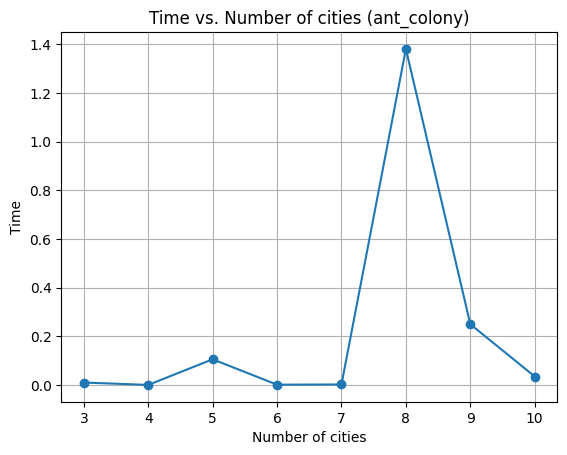

In [11]:
i_values = range(3, 11)

plt.plot(i_values, times_ant_colony, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of cities (ant_colony)')

plt.grid(True)

plt.show()